In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
df=sns.load_dataset("mpg")
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [17]:
continoues_varibles = ['mpg',"displacement","horsepower","weight","acceleration"]
discreat_varivles = ["cylinders","model_year","origin","name"]

In [5]:
df["mpg"].mean()

23.514572864321615

In [51]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<AxesSubplot:>

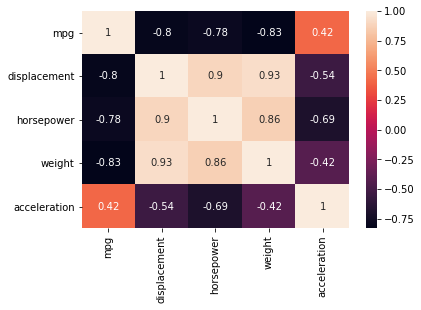

In [44]:
sns.heatmap(df[continoues_varibles].corr(),annot=True)

<AxesSubplot:ylabel='Count'>

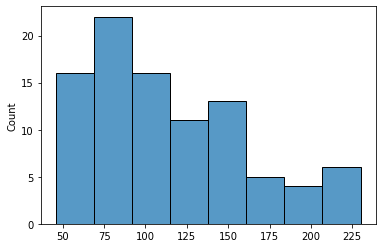

In [42]:
sns.histplot(x=df['horsepower'].value_counts().index)

<AxesSubplot:ylabel='Frequency'>

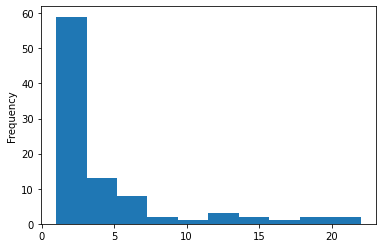

In [33]:
df['horsepower'].value_counts().plot(kind="hist")

<AxesSubplot:>

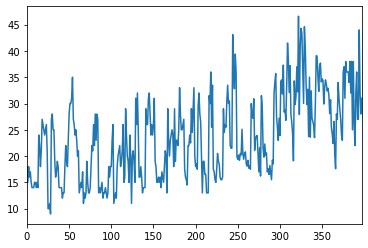

In [28]:
df["mpg"].plot()

<AxesSubplot:ylabel='Frequency'>

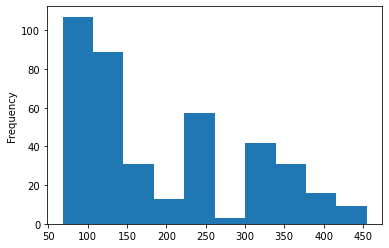

In [30]:
df["displacement"].plot(kind="hist")

<AxesSubplot:ylabel='cylinders'>

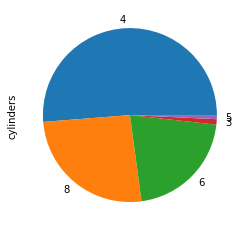

In [25]:
df["cylinders"].value_counts().plot("pie")

<AxesSubplot:>

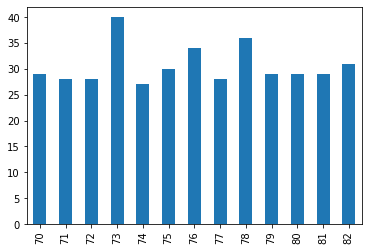

In [23]:
df['model_year'].value_counts().sort_index().plot(kind="bar")

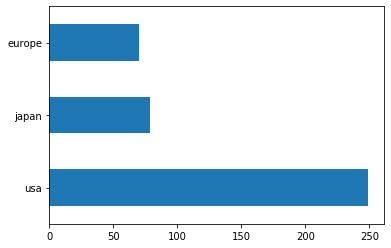

In [55]:
df['origin'].value_counts().plot(kind="barh")

In [51]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [47]:
ohe=OneHotEncoder()

In [53]:
temp=ohe.fit_transform(pd.DataFrame(df['origin']))
temp.shape

(398, 3)

In [62]:
pd.DataFrame(temp.toarray(),columns=ohe.categories_).head()

,europe,japan,usa
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [64]:
df=df.join(pd.get_dummies(df['origin'],prefix="origin"))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,0,1


In [68]:
df["horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
data = df[df["horsepower"].notnull()]
lr.fit(data.drop(["horsepower","origin","name"],axis=1),data["horsepower"])

LinearRegression()

In [72]:
null_fil = df[df["horsepower"].isnull()]
lr.predict(null_fil.drop(["horsepower","origin","name"],axis=1))

array([58.61428083, 94.04859574, 57.11329221, 98.0382735 , 76.66962153,
       74.20342381])

In [77]:
df.loc[null_fil.index,"horsepower"] = lr.predict(null_fil.drop(["horsepower","origin","name"],axis=1))

In [81]:
df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model_year       0
origin           0
name             0
origin_europe    0
origin_japan     0
origin_usa       0
dtype: int64

In [ ]:
# outlayers 
# 1. box plot (q1-1.5*iqr,q3+1.5*iqr)
# 2. z score (-3,3) 

In [92]:
q1 = np.quantile(df["horsepower"],0.25)
q3 = np.quantile(df["horsepower"],0.75)
iqr = q3 -q1
q1,q3,iqr

(75.0, 125.0, 50.0)

In [93]:
q3+1.5*iqr,q1-1.5*iqr

(200.0, 0.0)

In [94]:
print(df.shape)
out = df[(df["horsepower"]<=q3+1.5*iqr) & ((df["horsepower"]>=q1-1.5*iqr))]
out.shape

(398, 12)


(388, 12)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

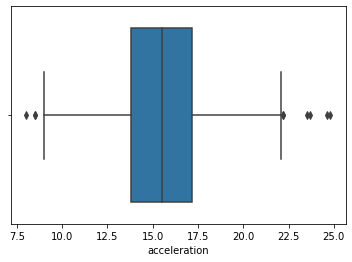

In [96]:
sns.boxplot(df["acceleration"])

In [112]:
temp = df.copy()
temp.shape

(398, 12)

In [113]:
temp["acceleration"] = (temp["acceleration"] - temp["acceleration"].mean()) / temp["acceleration"].std()
temp["acceleration"].sample(5)

232   -0.387314
49    -0.568625
59     2.876289
76    -0.387314
330    0.628029
Name: acceleration, dtype: float64

In [114]:
print(temp.shape)
temp = temp[(temp["acceleration"]<3) & (temp["acceleration"]>-3)]
temp.shape

(398, 12)


(396, 12)

In [115]:
df=df.drop(['origin','name'],axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [74]:
df.shape

(398, 10)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 10 columns):
mpg              398 non-null float64
cylinders        398 non-null int64
displacement     398 non-null float64
horsepower       392 non-null float64
weight           398 non-null int64
acceleration     398 non-null float64
model_year       398 non-null int64
origin_europe    398 non-null uint8
origin_japan     398 non-null uint8
origin_usa       398 non-null uint8
dtypes: float64(4), int64(3), uint8(3)
memory usage: 26.0+ KB


In [86]:
df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       6
weight           0
acceleration     0
model_year       0
origin_europe    0
origin_japan     0
origin_usa       0
dtype: int64

In [87]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())
df['horsepower'].isnull().sum()

0

In [ ]:
height = [4,5,6]
weight = [40,50,60]
(x1 - x2)**2

In [ ]:
# step 1 pick random centers
# find distsance to all data points
# assign clusters for each center
# change the center to middle of all assigned data points
# find distsance to all data points
# assign clusters for each center
# change the center to middle of all assigned data points

In [116]:
from sklearn.cluster import KMeans

In [117]:
km=KMeans(n_clusters=3,max_iter=400)

In [118]:
km.fit(df)

KMeans(max_iter=400, n_clusters=3)

In [119]:
km.labels_

array([2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2,

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

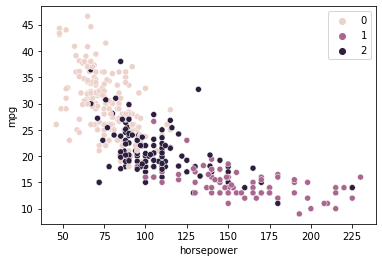

In [121]:
sns.scatterplot(x=df["horsepower"],y=df["mpg"],hue=km.labels_)

In [94]:
km.cluster_centers_.shape

(3, 10)

In [95]:
km.inertia_

34209172.40437155

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
mms=MinMaxScaler()
X=mms.fit_transform(df)
X.shape

(398, 10)

In [99]:
km=KMeans(n_clusters=3,max_iter=500)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
km.inertia_

131.06804641439237

# Elbow Method

In [102]:
k=[2,3,4,5,6,7,8,9]
inertia=[]
for i in k:
    km=KMeans(n_clusters=i)
    km.fit(X)
    inertia.append(km.inertia_)

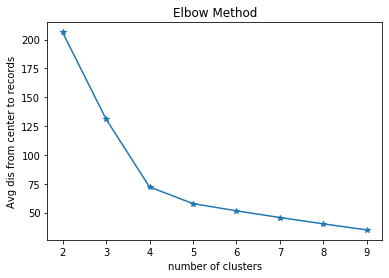

In [104]:
plt.plot(k,inertia,marker="*")
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("Avg dis from center to records")
plt.show()

In [105]:
km=KMeans(n_clusters=4,max_iter=500)

In [106]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [107]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_europe', 'origin_japan',
       'origin_usa'],
      dtype='object')

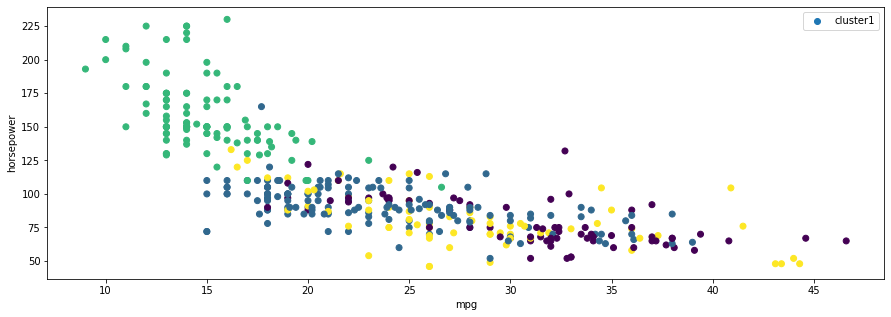

In [111]:
plt.figure(figsize=(15,5))
plt.scatter(df['mpg'],df['horsepower'],c=km.labels_)
plt.xlabel("mpg")
plt.ylabel("horsepower")
plt.legend(['cluster1',"cluster2","cluster3","cluster4"])
plt.show()

In [112]:
pd.DataFrame({"car_name":df.index,"cluster":km.labels_})

,car_name,cluster
0,chevrolet chevelle malibu,2
1,buick skylark 320,2
2,plymouth satellite,2
3,amc rebel sst,2
4,ford torino,2
...,...,...
393,ford mustang gl,1
394,vw pickup,3
395,dodge rampage,1
396,ford ranger,1
